### TODO
[x] How many of the energy pairs are in fact multiplets?

 ~97% are pairs, <3% multiplets

[x] Does the polarisation drop remain if I remove compton filtering?
    
Yes

[x] Does it remain if I make the polarisation criterion less strict?

Yes

[] Finding optimal settings for all this


In [1]:
from ginger import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:


true_pairs = [[],[],[]]

source_activity_points = 25
source_activity_per_second_range2 = np.logspace(7,10.5,source_activity_points)
simulation_time_for_min_source_activity = 10**8

print(f"This cell should take about {(source_activity_points/25)*(simulation_time_for_min_source_activity/10**8)*(source_activity_per_second_range2[0]/10**7)*20} minutes to run.")

for source_activity_per_second in source_activity_per_second_range2: # Source activity per second goes from 10**7 to 10**9.5
    source_activity_slice = source_activity_per_second/10**9
    # To maintain consistent total activity,
    # time of simulation * source_activity = 10**7 * min_source_activity
    # print(type(10**7 * source_activity_per_second_range[0] / source_activity_per_second))
    detected_photons = simulation(time_unit, 100,
                                  simulation_time_for_min_source_activity * source_activity_per_second_range2[0] / source_activity_per_second,
                                  source_activity_slice, silent=True)

    energy_paired_events = pairing(detected_photons, time_window)
    energy_polarisation_paired_events = pairing(detected_photons, time_window, polarisation_correlation=True, polarisation_min_angle_deg=80)
    polarisation_paired_events = pairing(detected_photons, time_window, polarisation_correlation=True, polarisation_min_angle_deg=80, compton_filter=False)
    

    true_pairs[0].append(num_true_pairings(energy_paired_events,strict=True))
    true_pairs[1].append(num_true_pairings(energy_polarisation_paired_events))
    true_pairs[2].append(num_true_pairings(polarisation_paired_events))


This cell should take about 0.002 minutes to run.


TypeError: simulation() got an unexpected keyword argument 'silent'

In [6]:
n_comparisons = 3
comparison_labels = ["Energy Criterion","Energy + Polarisation Criteria","Polarisation Criterion"]

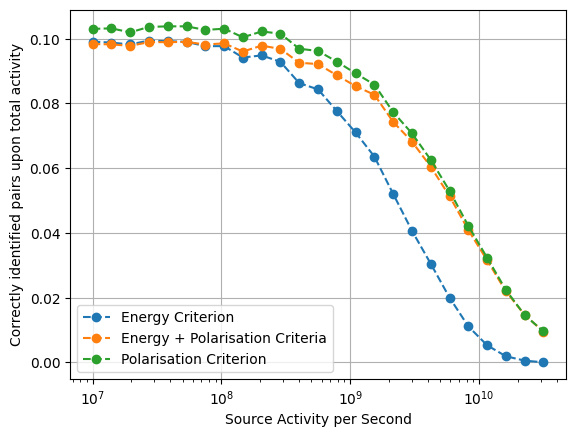

In [17]:
# total activity = time of simulation * source_activity_per_nanosecond = 10**7 * min_source_activity_per_nanosecond = min_source_activity / 10**2
for i in range(n_comparisons):
    plt.plot(source_activity_per_second_range2,true_pairs[i]/source_activity_per_second_range2[0]*10**2,
            label=comparison_labels[i],marker='o',linestyle='--')

plt.legend()
plt.xscale("log")
plt.xlabel("Source Activity per Second")
plt.ylabel("Correctly identified pairs upon total activity")
plt.grid(True)
plt.savefig(f"Comparison - {comparison_labels}.png")

In [18]:
df = pd.DataFrame(columns=['source activity','true energy pairs','true energy + pol pairs','true pol pairs'])


for i in range(len(source_activity_per_second_range2)):
    df.loc[len(df.index)] = [source_activity_per_second_range2[i],
                             true_pairs[0][i],
                             true_pairs[1][i],
                             true_pairs[2][i]]

with open("results.csv",'w') as f:
    f.write(df.to_csv())

In [9]:
angle_variation_true_pairs = [[],[],[]]
energy_true_pairs = []
angle_range = list(range(0,90,10))
source_activity_per_second_range3 = np.array([1,10,100,1000])*10**7
# Total activity 10**5 degenerations
for i in range(len(source_activity_per_second_range3)):
    detected_photons = simulation(time_unit, 100,
                                  10**7 * source_activity_per_second_range3[0] / source_activity_per_second_range3[i],
                                  source_activity_per_second_range3[i]/10**9)
    energy_paired_events = pairing(detected_photons, time_window)
    energy_true_pairs.append(num_true_pairings(energy_paired_events, strict= True))
    for min_angle in angle_range:
        polarisation_paired_events = pairing(detected_photons, time_window, polarisation_correlation=True, polarisation_min_angle_deg=min_angle)
        
        angle_variation_true_pairs[i].append(num_true_pairings(polarisation_paired_events, strict=True))


Simulation started, will take approximately 7.146652638874998 seconds.
Simulation started, will take approximately 7.146652638874998 seconds.
Simulation started, will take approximately 7.146652638874998 seconds.


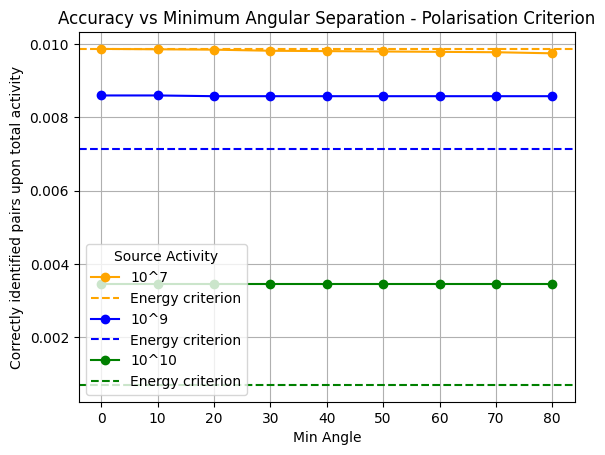

In [10]:
colors = ['orange','b','g','r']
for i in range(len(source_activity_per_second_range3)):
    plt.plot(angle_range,np.array(angle_variation_true_pairs[i])/10**5,
            marker='o',label=f"10^{int(np.log10(source_activity_per_second_range3[i]))}",color = colors[i])
    plt.axhline(y=energy_true_pairs[i]/10**5, linestyle='--',color = colors[i], label = "Energy criterion")
plt.title("Accuracy vs Minimum Angular Separation - Polarisation Criterion")
plt.xlabel("Min Angle")
plt.ylabel("Correctly identified pairs upon total activity")
plt.legend(title="Source Activity")
plt.grid(True)
plt.savefig("accuracy_vs_min_angle.png")

In [13]:
source_activity_per_second_range4 = np.array([1,10,100])*10**7
print(*source_activity_per_second_range4)

compton_variation_pol_true_pairs = [[],[],[]]
compton_variation_pol_energy_true_pairs = [[],[],[]]
compton_variation_energy_true_pairs = [[],[],[]]
compton_range = list(np.linspace(0,1,21))
print(compton_range)

# Total activity 10**5 degenerations
for i in range(len(source_activity_per_second_range4)):
    for j in range(len(compton_range)):
        detected_photons = simulation(time_unit, 100,
                                  10**7 * source_activity_per_second_range4[0] / source_activity_per_second_range4[i],
                                  source_activity_per_second_range4[i]/10**9,
                                  compton_range[j])
        
        energy_paired_events = pairing(detected_photons, time_window)
        compton_variation_energy_true_pairs[i].append(num_true_pairings(energy_paired_events, strict= True))

        polarisation_paired_events = pairing(detected_photons, time_window, polarisation_correlation=True, polarisation_min_angle_deg=0, compton_filter=False)
        compton_variation_pol_true_pairs[i].append(num_true_pairings(polarisation_paired_events, strict=True))

        polarisation_energy_paired_events = pairing(detected_photons, time_window, polarisation_correlation=True, polarisation_min_angle_deg=0)
        compton_variation_pol_energy_true_pairs[i].append(num_true_pairings(polarisation_paired_events, strict=True))


10000000 100000000 1000000000
[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0]
Simulation started, will take approximately 7.146652638874998 seconds.
Simulation started, will take approximately 7.146652638874998 seconds.
Simulation started, will take approximately 7.146652638874998 seconds.
Simulation started, will take approximately 7.146652638874998 seconds.
Simulation started, will take approximately 7.146652638874998 seconds.
Simulation started, will take approximately 7.146652638874998 seconds.
Simulation started, will take approximately 7.146652638874998 seconds.
Simulation started, will take approximately 7.146652638874998 seconds.
Simulation started, will take approximately 7.146652638874998 seconds.
Simulation started, will take approximately 7.146652638874998 seconds.
Simulation started, will take approximat

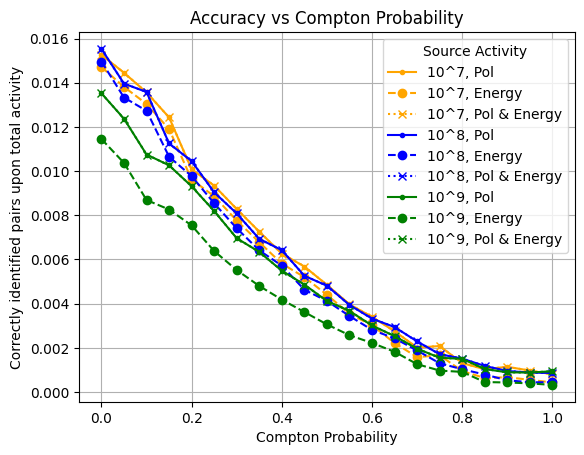

In [14]:
colors = ['orange','b','g']
for i in range(len(source_activity_per_second_range4)):
    plt.plot(compton_range,np.array(compton_variation_pol_true_pairs[i])/10**5,
            marker='.',label=f"10^{int(np.log10(source_activity_per_second_range4[i]))}, Pol",color = colors[i])
    plt.plot(compton_range,np.array(compton_variation_energy_true_pairs[i])/10**5,
            marker='o',linestyle='--',label=f"10^{int(np.log10(source_activity_per_second_range4[i]))}, Energy",color = colors[i])
    plt.plot(compton_range,np.array(compton_variation_pol_energy_true_pairs[i])/10**5,
            marker='x',linestyle=':',label=f"10^{int(np.log10(source_activity_per_second_range4[i]))}, Pol & Energy",color = colors[i])
plt.title("Accuracy vs Compton Probability")
plt.xlabel("Compton Probability")
plt.ylabel("Correctly identified pairs upon total activity")
plt.legend(title="Source Activity")
plt.grid(True)
plt.savefig("accuracy_vs_compton_probab.png")